But before that, let's take a moment to formalize our perspective thus far.

`pandas`
* Advantages:
  * Immediately available.
  * Exposes a number of advanced tools.
* Disadvantages:
  * Data must be put in the right shape, which can be hard to do.
  * Default style is only so-so.
* Analogy:
  * A box of Crayola markers, because it lets you color in the picture.

`seaborn`
* Advantages:
  * Works with the data for you, instead of making you work with the data for it.
  * Exposes a number of advanced tools.
* Disadvantages:
  * Modifying plots is sometimes a buggy experience.
* Analogy:
  * A box of precision German Staedtler markers: for when you *really* feel like getting some coloring done.
  
`matplotlib`
* Advantages:
  * Low-level.
* Disadvantages:
  * Low-level.
* Analogy:
  * Elmer's Glue: it's a safe and reliable way of sticking things together, but takes forever to set, oozes all over the place, and smells kind of funny.

Onto our next tool.

Do you enjoy Talk like a Pirate Day?

Do you think that array indices actually start from 1?

Do you think statistics are cool?

Do you really wish that Python libraries would start releasing example datasets as packages?

Then you would be a fan of `ggplot`!

`ggplot` is a Python data visualization package written by folks from yhat, a data science consultancy startup headquartered here in New York City.

Except it's not.

It's actually a repackaged API port of `ggplot2`: a data visualization library in the R programming language written by Hadley Wickham.

Wickham has written many of the most popular and important `R` packages, and this was his contribution to the `R` data visualization ecosystem. The API is designed to correspond with what is known as the "grammar of graphics", which is an evolved way of doing data visualization which instead of using the declarative style used by all of the packages we've seen thus far, emphasizes a more abstract way of thinking where instead of "creating a chart" you "annotate your data".

People in the R community have more or less spilled blood over the question of which is better, base R plotting or `ggplot2`. I don't know anything about it, but I do know something about what that looks like in Python, so let's go over that instead.

So to begin with, the Grammer of Graphics style encourages doing something that's always a bit dicey: a global import. That's a lot of stuff going into your global namespace:

In [3]:
import copy

before = copy.deepcopy(list(globals().keys()))

In [4]:
from ggplot import *

In [5]:
after = copy.deepcopy(list(globals().keys()))

In [7]:
difference = set(after).difference(set(before))

In [8]:
difference

{'Facet',
 '_i4',
 '_i5',
 'absolute_import',
 'aes',
 'before',
 'chart_components',
 'chopsticks',
 'colors',
 'coord_equal',
 'coord_flip',
 'coord_polar',
 'coords',
 'datasets',
 'date_breaks',
 'date_format',
 'diamonds',
 'discretemappers',
 'division',
 'element_text',
 'facet_grid',
 'facet_wrap',
 'facets',
 'geom_abline',
 'geom_area',
 'geom_bar',
 'geom_bin2d',
 'geom_blank',
 'geom_boxplot',
 'geom_density',
 'geom_errorbar',
 'geom_histogram',
 'geom_hline',
 'geom_jitter',
 'geom_line',
 'geom_now_its_art',
 'geom_path',
 'geom_point',
 'geom_polygon',
 'geom_rect',
 'geom_ribbon',
 'geom_step',
 'geom_text',
 'geom_tile',
 'geom_violin',
 'geom_vline',
 'geoms',
 'ggplot',
 'ggtitle',
 'labs',
 'legend',
 'load_world',
 'meat',
 'movies',
 'mpg',
 'mtcars',
 'pageviews',
 'pigeons',
 'print_function',
 'qplot',
 'salmon',
 'scale_alpha_identity',
 'scale_color_brewer',
 'scale_color_crayon',
 'scale_color_funfetti',
 'scale_color_gradient',
 'scale_color_identity',
 's

Since I've never used R, I can't tell you what R thinks about this problem. In Python, however, outside of experimentation, for safety's sake I always recommend only importing the names you need by using e.g. `from ggplot import (aes, before, utils)`.

We forge on. Why do want these to be globals? Because the grammar of graphics is all about expressiveness:

In [9]:
import pandas as pd
collisions = pd.read_csv("../data/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

%matplotlib inline

In [44]:
pd.set_option("max_columns", None)

In [68]:
collisions.columns = collisions.columns.map(lambda c: c.replace(" ", "_"))

In [69]:
collisions.head()

,DATE,TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,UNIQUE_KEY,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,11/10/2016,15:11,NaN,NaN,NaN,NaN,NaN,MONROE STREET,NaN,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3559084,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,04/16/2016,4:13,NaN,NaN,40.767373,-73.950057,"(40.767373, -73.9500574)",EAST 68 STREET,NaN,NaN,1,0,0,0,0,0,1,0,Fatigued/Drowsy,Fatigued/Drowsy,Fatigued/Drowsy,NaN,NaN,3408932,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN
2,04/16/2016,4:22,NaN,NaN,NaN,NaN,NaN,BORDEN AVENUE,58TH STREET,NaN,1,0,1,0,0,0,0,0,Passenger Distraction,NaN,NaN,NaN,NaN,3425902,NaN,NaN,NaN,NaN,NaN
3,04/16/2016,4:30,BRONX,10468.0,40.862679,-73.909040,"(40.8626793, -73.9090397)",SEDGWICK AVENUE,WEST FORDHAM ROAD,NaN,0,0,0,0,0,0,0,0,Alcohol Involvement,NaN,NaN,NaN,NaN,3414396,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,04/16/2016,4:30,BROOKLYN,11249.0,40.716508,-73.961275,"(40.7165078, -73.9612751)",NaN,NaN,203 BERRY STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3421852,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [71]:
df = collisions.dropna(subset=['BOROUGH'])

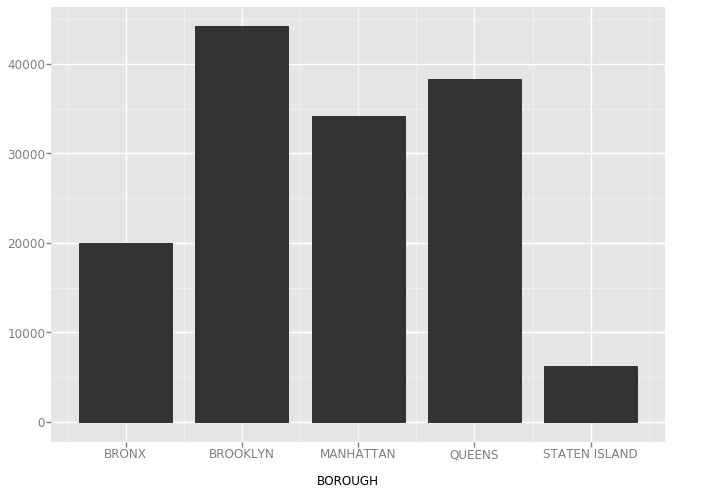

<ggplot: (8746262967763)>

In [50]:
(
    ggplot(aes(x='BOROUGH'), data=df) +
    geom_bar()
)

`aes` is short for "aesthetic" and it controls the data that you will be plotting. Everything that comes after this expression is an annotation of some kind, whether that be a modification of the axis, or overlaying a new plot, or creating a subplot.

Everything is handled by this overloaded `+` operator.

In [90]:
top_five_collision_factors = collisions['CONTRIBUTING_FACTOR_VEHICLE_1'].value_counts().iloc[1:6].index

collisions_of_interest = collisions[
    (collisions['CONTRIBUTING_FACTOR_VEHICLE_1'].isin(top_five_collision_factors)) &
    (collisions['NUMBER_OF_PERSONS_INJURED'] <= 2)
]

# A bit of additional clean-up this time, for no particular reason.
collisions_of_interest = collisions_of_interest[['BOROUGH', 'CONTRIBUTING_FACTOR_VEHICLE_1']]
collisions_of_interest.rename(columns={'CONTRIBUTING_FACTOR_VEHICLE_1': 'CONTRIBUTING_FACTOR'}, inplace=True)
collisions_of_interest.dropna(subset=['BOROUGH'], inplace=True)

collisions_of_interest.head()

,BOROUGH,CONTRIBUTING_FACTOR
10,BROOKLYN,Driver Inattention/Distraction
18,BROOKLYN,Failure to Yield Right-of-Way
21,MANHATTAN,Failure to Yield Right-of-Way
28,BRONX,Driver Inattention/Distraction
30,QUEENS,Fatigued/Drowsy


Notice a weakness of the `ggpy` API, columns can't have spaces in their names.

The same plot as before:

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/ggplot/ggplot.py:602: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fill_levels = self.data[[fillcol_raw, fillcol]].sort(fillcol_raw)[fillcol].unique()


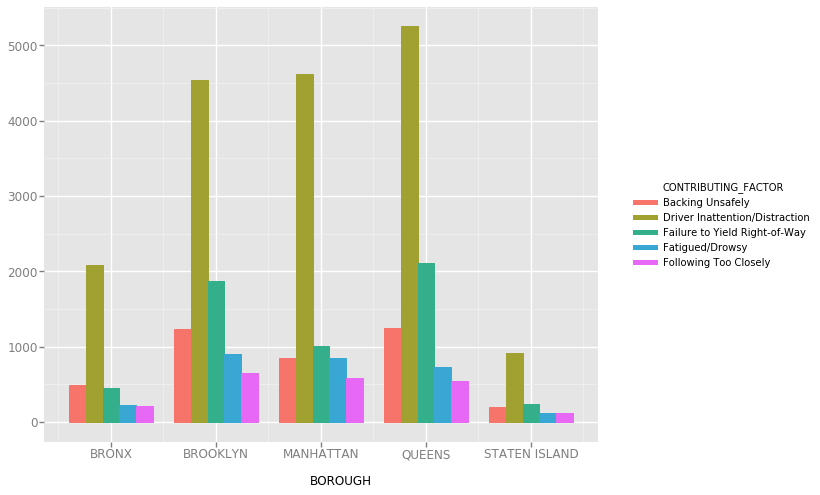

<ggplot: (-9223363290593777001)>

In [93]:
(
    ggplot(aes(x='BOROUGH', fill='CONTRIBUTING_FACTOR'), data=collisions_of_interest) +
    geom_bar()
)

Let's now jump off our collisions dataset and look at a few examples that the library provides. To start with, here's a dataset of meat exports (or imports?) to the US over time.

In [56]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


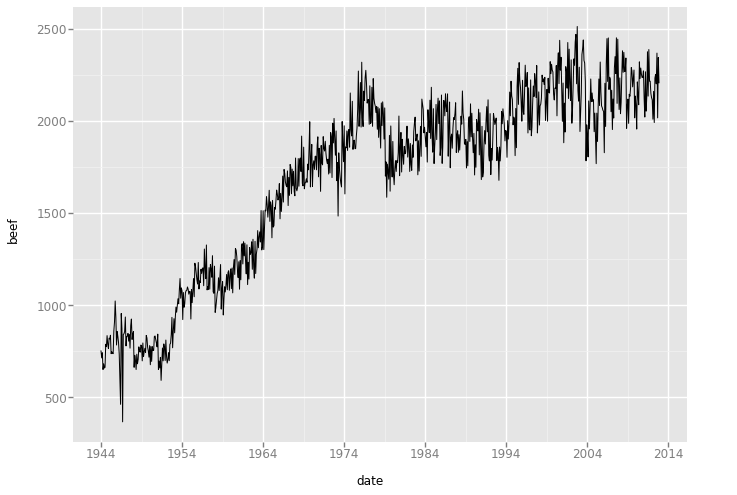

<ggplot: (8746255905863)>

In [105]:
ggplot(meat, aes(x='date', y='beef')) + geom_line()

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


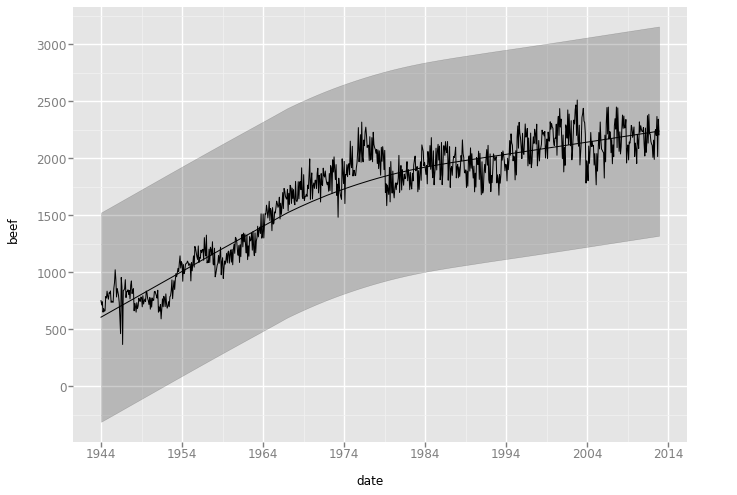

<ggplot: (-9223363290599004114)>

In [107]:
(
    ggplot(meat, aes(x='date', y='beef')) 
    + geom_line()
    + stat_smooth(method='loess') 
    + scale_x_date(labels='%Y')
)

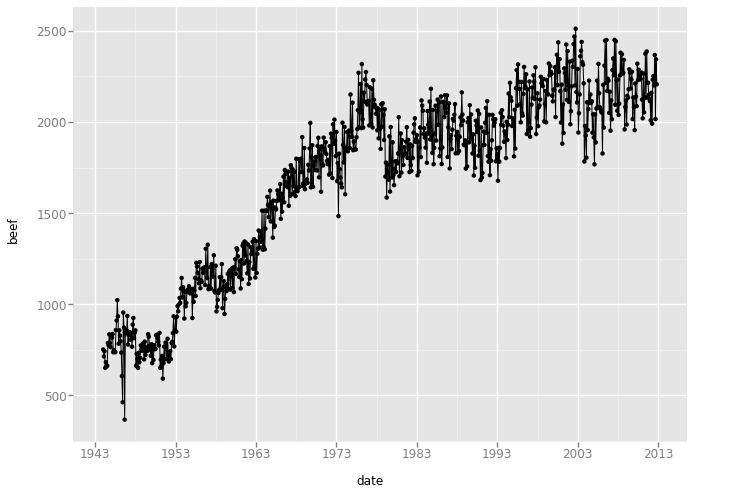

<ggplot: (8746255649754)>

In [109]:
(
    ggplot(meat, aes(x='date', y='beef')) 
    + geom_line()
    + geom_point()
    + scale_x_date(labels='%Y')
)

I think that this feels very clean and very elegant because we give formatting the same semantic meaning and structure as we do to plotting. To see what I mean, observe what the code looks like when we achieve the same effect using `seaborn` and `pandas` instead.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

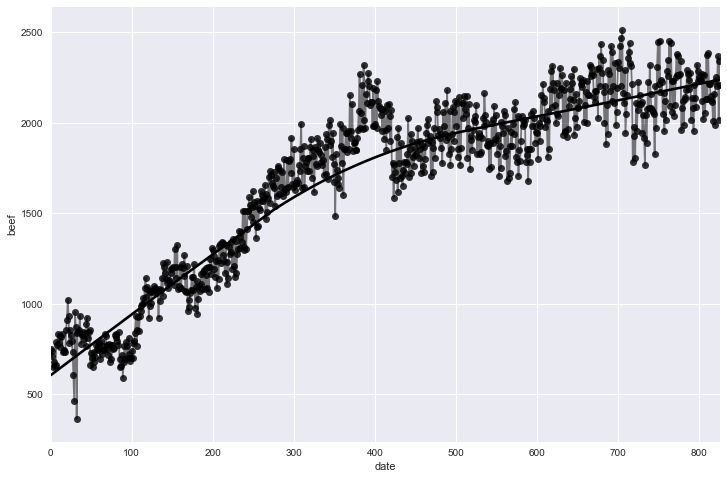

In [137]:
fig = plt.figure(figsize=(12, 8))

meat['beef'].plot.line(color='black', alpha=0.5)
sns.regplot(x="date", y="beef", data=meat.assign(date=range(len(meat))), lowess=True, color='black')

Each plot is a declarative statement: we first create our line, and then we create our points and regression. These two operations are semantically distinct, necessitating that we embed the formatting that we need as keyword arguments to the functions.

`ggpy`, by contrast, treats each bit of formatting and plotting alike as a separate component, allowing us to organize our plot in a functional way by chaining `+` operators.

I think it's most helpful to think of this grammar of graphics methodology as an additional layer of abstraction. Shape primitives (circles, lines, polygons) corall pixels; plot types (bar charts, line charts, heatmaps) corall shapes; and grammar of graphics syntax coralls plot types.

So then what's the fuss about? Citing what Wikipedia says is the fundamental theorem of software engineering...

>  We can solve any problem by introducing an extra level of indirection.

...grammar of graphics syntax makes chart-building more logical and easier to grasp, and makes subplot faceting&mdash;an aspect of that that we don't have time to explore&mdash;a natural extension of that. But heed also the corollary...

>  Except too many levels of indirection.

...since the actual work is done not inside of objects but in the composition stage between them, `ggpy` is harder to debug than a "vanilla" object-oriented API. If something breaks, the error message is not very helpful!

I see nothing wrong and a whole lot right with `ggpy` and the syntax it uses, but at the end of the end of the day it is a bit of a personal decision. Use whatever floats your boat!

Let's look at a few more examples to sum up.

In [165]:
sns.set_style(None)

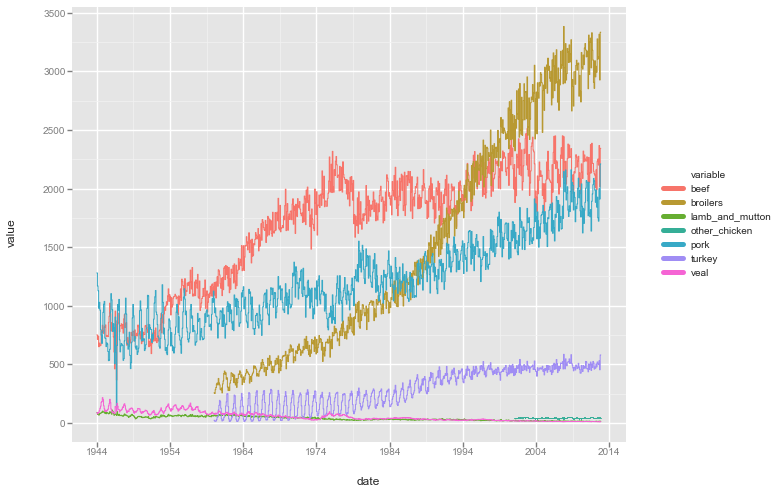

<ggplot: (-9223363290601474423)>

In [167]:
(
    ggplot(aes(x='date', y='value', color='variable'), data=pd.melt(meat, id_vars="date"))
    + geom_step()
)

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')
/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


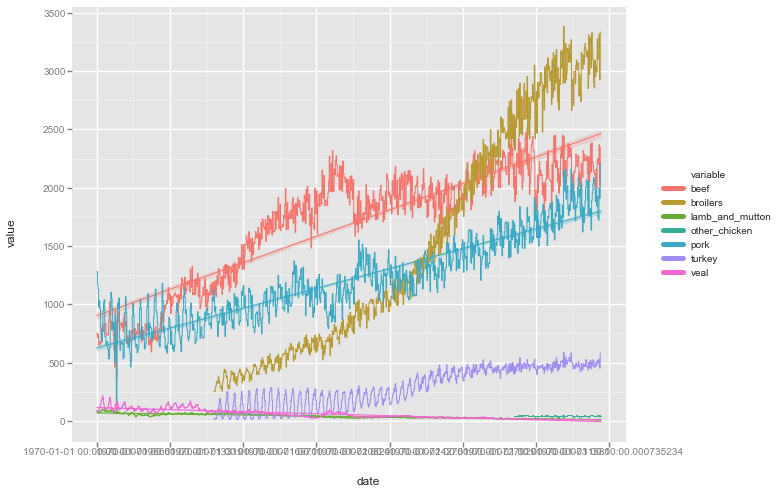

<ggplot: (-9223363290601749893)>

In [168]:
(
    ggplot(aes(x='date', y='value', color='variable'), data=pd.melt(meat, id_vars="date"))
    + geom_step()
    + stat_smooth(method='lm')
)

In [169]:
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


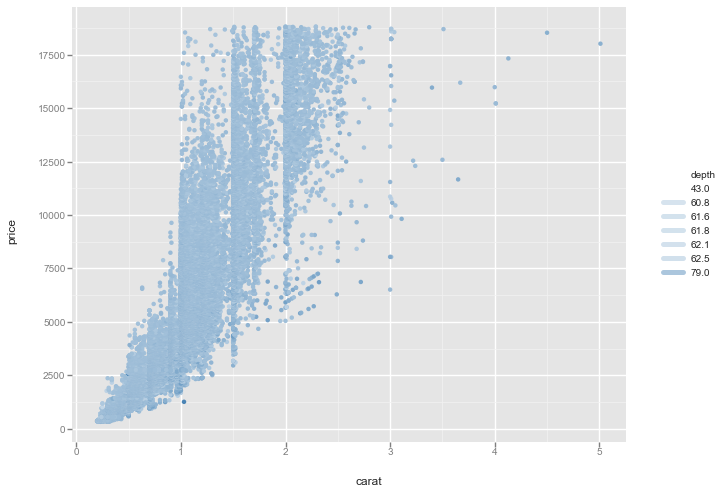

<ggplot: (8746252292651)>

In [182]:
(
    ggplot(diamonds, aes(x='carat', y='price', color='depth')) 
    + geom_point() 
    + scale_color_gradient(low="white", high="steelblue")
)

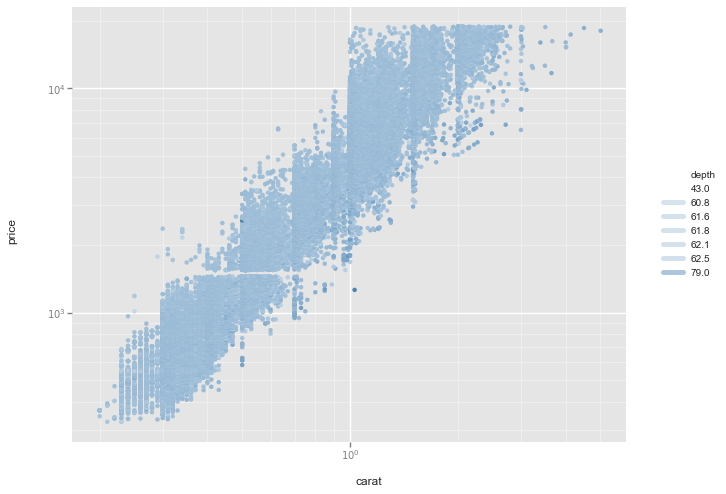

<ggplot: (-9223363290602563717)>

In [183]:
(
    ggplot(diamonds, aes(x='carat', y='price', color='depth')) 
    + geom_point() 
    + scale_color_gradient(low="white", high="steelblue")
    + scale_x_log()
    + scale_y_log()
)

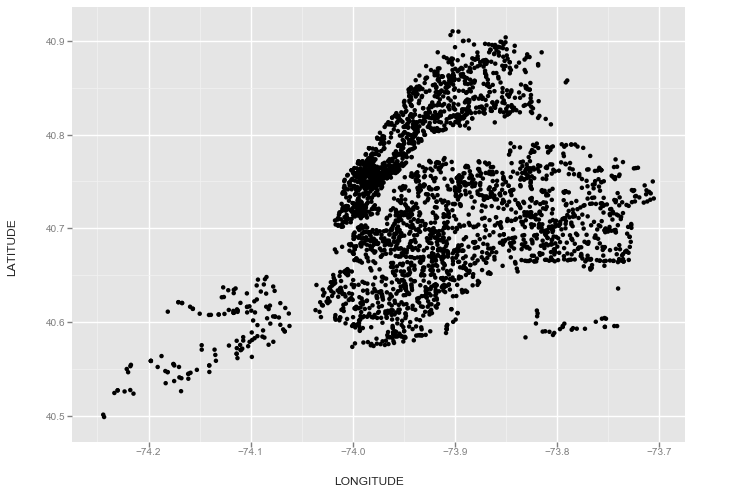

<ggplot: (-9223363290607757105)>

In [216]:
df = collisions.sample(5000)[['LATITUDE', 'LONGITUDE']].dropna()

(
    ggplot(aes(x='LONGITUDE', y='LATITUDE'), data=df) 
    + geom_point()
)

Combine ops pls.

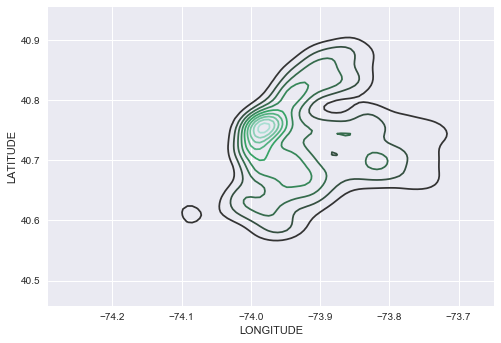

In [197]:
df = collisions.sample(5000)[['LATITUDE', 'LONGITUDE']].dropna()

(
    ggplot(aes(x='LONGITUDE', y='LATITUDE'), data=df) 
    + geom_point()
)

ax = plt.gca()
sns.kdeplot(df['LONGITUDE'], df['LATITUDE'], ax=ax)

Note that `ggplot` is also `matplotlib`-based! However, I haven't yet worked out how to go about combining its figures with those generated by `pandas` and `seaborn`, so that's still a TODO.

`ggpy`

* Advantages:
  * Clean, pleasant-to-work-with syntax.
  * Doesn't make you work with your data format, makes your data format work for you.

* Disadvantages:
  * No "killer feature" plots; ultimately doesn't do anything `pandas` and/or `seaborn` don't already do.

* Analogy:
  * A box of erasable markers: they seem cool, and people say that it's the future of elementary school drawings, but they've been around for awhile and still have yet to take over the world.

While I think using `ggpy` in day-to-day work is optional, I definitely think everyone should play with it at least once to get a feel for what it's about.

And our updated chart:

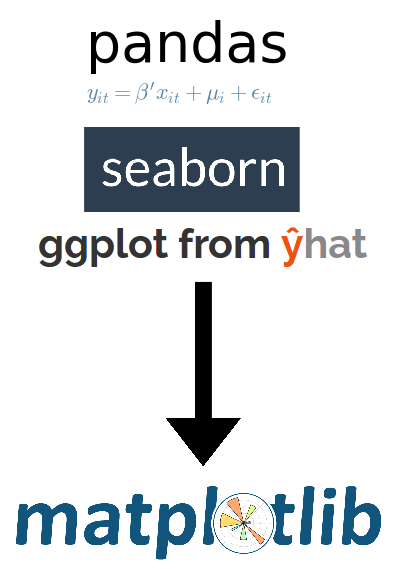

In [219]:
from IPython.display import Image

Image("../figures/pandas-seaborn-matplotlib-ggplot.png")